### Questions

Dataset : https://www.kaggle.com/uciml/pima-indians-diabetes-database

1. Split the dataset (80, 20) into training and testing set.
2. Train a Linear Regression model to predict "BMI" using all other features available in the dataset.
3. Plot the "Cost function vs Iterations" curve.
4. Perform greedy search to find optimal learning rate.  
5. Plot the "Predicted BMI value($\hat{Y}_i$)" vs "Actual BMI value(${Y}_i$)" curve (Scatter Plot).
6. Perform PCA on the dataset and reduce the dimensionality to 2 and train a new model on these newly obtained features.
7. Plot the "Cost function vs Iterations" curve for this new model.
8. Plot the "Predicted BMI value($\hat{Y}_i$) of the new model" vs "Actual BMI value(${Y}_i$)" curve(it is a scatter plot)
9. Show the scatter plot of PCA generated new features and also show the linear regression curve that you got from new model.

**You can use libraries to solve these questions**

Sample plot for 8th step
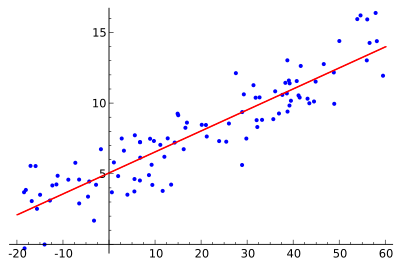

# Train a Linear Regression model to predict "BMI" using all other features available in the dataset.

## Import

In [1]:
# import all nececssary libraries
# split the dataset into train and test set
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])
%matplotlib inline

## Load in the data
### Set BMI as the target value and all other values as features

In [2]:
def extractfeatures(filename):
    x=np.genfromtxt(filename,delimiter=',')
    
    xfeatures = x[:,(0,1,2,3,4,6,7,8)] #get all columns, leaving out the BMI column - features
    y = x[:,5] #get the BMI column
    
    return xfeatures, y

In [3]:
#Load the data
X,y=extractfeatures('diabetes.csv')#loading data from training dataset
m=len(y) # number of training examples
print("Loaded",str(m), "training examples")

Loaded 769 training examples


## Delete first row of 'nan's

In [4]:
# Delete first nan value in y and X
y = np.delete(y, 0)
X = np.delete(X, 0, axis=0) #delete the first row of nan values

## Normalize the input data (features)

In [5]:
def normalizeFeatures(X):
    
    #Using Max/Min normalization
    # X_normalized = (X-X_min)/(X_max-X_min)
    
    #print("X min:")
    #print(X.min())
    #print("X max:")
    #print(X.max())
    
    X_manual_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    return X_manual_scaled

    ####Gives NaN values:
    #norm_array = []
    #for i in X.T: #loop through the transpose of the array. So each loop, a refference to X is all values of one feature
    #    column_mean = np.mean(X) # get the mean of a single feature
    #    print(X)
    #    column_std_dev = np.std(X) #get the standard deviation of a single feature
    #    #print(column_std_dev)
    #    X_norm_current = (X - column_mean) / column_std_dev
    #    norm_array.append(X_norm_current)
    #return norm_array

#Normalize the data
#X = np.delete(X, 0, axis=0) #delete the first row of nan values
norm_X=np.apply_along_axis(normalizeFeatures, axis = 0, arr=X) #call the function one column at a time
print("Data Normalization ended")

#check that the values are now between 1 and 0
print(norm_X.max())
print(norm_X.min())

In [6]:
#Normalize the data
norm_X=np.apply_along_axis(normalizeFeatures, axis = 0, arr=X) #call the function one column at a time
print("Data Normalization ended")

Data Normalization ended


## Split the dataset (80, 20) into training and testing set.

In [7]:
def split2D(inputArray):
    train_num = m * 0.8 #multiply the number of items by 0.8 to get 80%
    round(train_num,0) #round to the nearest whole number
    train_num = int(train_num) #convert the slice index into an int
    training, test = inputArray[:train_num,:], inputArray[train_num:,:] #set training to the first 80% and test to the last 20%
    return training, test

In [8]:
def split1D(inputArray):
    train_num = m * 0.8 #multiply the number of items by 0.8 to get 80%
    round(train_num,0) #round to the nearest whole number
    train_num = int(train_num) #convert the slice index into an int
    training, test = inputArray[:train_num], inputArray[train_num:] #set training to the first 80% and test to the last 20%
    return training, test

In [9]:
#Split the data
Xtraining, Xtest = split2D(norm_X) #split the X (features) into training and testing arrays
ytraining, ytest = split1D(y) #split the y (or outcome) into training and testing arrays
ytraining.reshape(615,-1)
Xtraining.reshape(615,-1)

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.41176471, 0.84422111, 0.72131148, ..., 0.30273271, 0.31666667,
        1.        ],
       [0.35294118, 0.52763819, 0.6557377 , ..., 0.34158839, 0.08333333,
        0.        ],
       [0.64705882, 0.69346734, 0.60655738, ..., 0.20452605, 0.48333333,
        1.        ]])

In [10]:
print("Number of X Training Samples: ")
print(len(Xtraining)) # number of training examples
print("Number of X Testing Samples: ")
print(len(Xtest))
print("Total Number of samples: ")
print(len(Xtest) + len(Xtraining))
#########################################
print("Number of y Training Samples: ")
print(len(ytraining)) # number of training examples
print("Number of y Testing Samples: ")
print(len(ytest))
print("Total Number of samples: ")
print(len(ytest) + len(ytraining))

Number of X Training Samples: 
615
Number of X Testing Samples: 
153
Total Number of samples: 
768
Number of y Training Samples: 
615
Number of y Testing Samples: 
153
Total Number of samples: 
768


BMI_target = X.T[5] #Set the BMI target value to the 5th column, this is the target value
new_X = np.vstack([X.T,y]) #Transpose X and add the diabetes (0/1) row onto our X features variable
new_X.shape #(9,768) means 9 rows and each row is 768 long
new_X = np.delete(new_X, 5, 0) #np delete (2d array to delet, object to delete, Axis) This is deleting BMI from the features
new_X.shape #(8,768) means 8 rows and each row is 768 long
new_X = new_X.T #Transpose the X features again to get it back to the original. Shape is now (768, 8)

## Analytical Solution of finding theta

In [11]:
#Analytical Solution of finding theta
#Calculate the theta values without actually training a model
#Just use linear regression equation to calculate
#A = np.c_[np.ones((norm_X.size,1)),norm_X]
#theta = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)    #x transpose into X (inverse), into X transpose into y
#print('Theta (analytical): [ {:0.3f} , {:0.3f} ]^t'.format(theta[0],theta[1]))

#Concatenate x_train list with matrix of 1's and compute the coefficient matrix

ones_matrix = np.ones((615,1)) # create a matrix with 768 rows and 1 column filled with ones
x_train_matrix = np.matrix(Xtraining) # copy the x training matrix
concatenate_matrix = np.concatenate((ones_matrix,x_train_matrix),axis=1) # concatenate the x training matrix and the 1's  
concat_transpose = concatenate_matrix.T # Transpose the concatenated matrix
inverse_of_product = np.linalg.inv(np.matmul(concat_transpose,concatenate_matrix)) # Inverse of the product of concatenated and transpose

y_training=np.matrix(ytraining) # Copy the target values
y_training=y_training.T # Transpose the target values

a=np.matmul(inverse_of_product,concat_transpose) # get the product
b=np.matmul(a,y_training) # get the product
print(b)

[[19.7223945 ]
 [-0.4172547 ]
 [ 3.83953538]
 [ 9.47788701]
 [16.17369664]
 [-2.38838577]
 [ 1.12264462]
 [-1.06411272]
 [ 4.29431642]]


In [12]:
A = np.c_[np.ones((615, 1)), Xtraining]  # add x0 = 1 to each instance
theta = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y_training)
print(theta)

[[19.7223945 ]
 [-0.4172547 ]
 [ 3.83953538]
 [ 9.47788701]
 [16.17369664]
 [-2.38838577]
 [ 1.12264462]
 [-1.06411272]
 [ 4.29431642]]


## Define Methods to Perform Gradient Descent

In [13]:
def computeCost(X,y,theta):
    m=len(y)
    J=0
    s=0
    
    #iterative solution
    for i in range(0,m): 
        s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2
    J=s/(2*m)
    
    #vectorized
    y=y.reshape(m,1)
    J1=(np.dot((np.dot(X,theta)-y).T, (np.dot(X,theta)-y)))/(2*m)
    
    return J1

In [14]:
def gradientDescent(X,y,theta,alpha,iterations):
    
    J_history=np.zeros((iterations,1))
    
    m=len(y)
    y=y.reshape(m,1)
    prediction_list = []
    hypothesis = 0

    for iter in range(0,iterations):
        prediction = np.dot(X,theta)
        prediction_list.append(prediction)
        error = prediction - y
        theta = theta - alpha*(1/m)*np.dot(X.T, error)
        
        J_history[iter]=computeCost(X,y,theta)
        
    return theta, J_history

In [15]:
def sumSquaresError(y, y_pred):
    return round(((y-y_pred)**2).sum()/len(y),3)

In [16]:
def predict(theta,X):

    #Looping solution:solution = (theta[0]*X[i,0])+(theta[1]*X[i,1])+(theta[2]*X[i,2])+(theta[3]*X)+(theta[4]*X)+(theta[5]*X)+(theta[6]*X)+(theta[7]*X)+theta[8]
    #solution = (theta[0]+theta[1]+theta[2]+theta[3]+theta[4]+theta[5]+theta[6]+theta[7])*X+theta[8]
    #solution = np.dot(X, theta)
    solution = X@theta

    return solution

#### Train the model

In [17]:
##Train the linear model with the 
m=len(ytraining)# number of training examples
input_X=np.c_[np.ones((m,1)),Xtraining] # Add a column of ones to X BIAS
theta=np.ones((9,1)) # Initialize fitting parameters #this has to be 9

#print(theta)

iterations=10000
alpha = 0.001  #this is the learning rate, play around with this

theta1,J_history=gradientDescent(input_X,ytraining,theta,alpha,iterations)#gets the final data and the values of cost function in each iteration
#print("theta1 is:")
#print(theta1)

#### Sum of Squared Errors for Training Data

In [18]:
#Training set error
print("The Sum of Squared Errors in the training set for alpha:", alpha, "is:", sumSquaresError(ytraining.reshape(615,-1), predict(theta1, input_X)))


The Sum of Squared Errors in the training set for alpha: 0.001 is: 50.074


#### Sum of Squared Errors for Test Data

In [19]:
m=len(ytest)# number of training examples
input_X_test=np.c_[np.ones((m,1)),Xtest] # Add a column of ones to X BIAS

print("The Sum of Squared Errors in the test set for alpha:", alpha, "is:", sumSquaresError(ytest.reshape(153,-1), predict(theta1, input_X_test)))


The Sum of Squared Errors in the test set for alpha: 0.001 is: 47.655


## Call Predict() to test it

In [20]:
m=len(ytest)# number of test examples

input_X=np.c_[np.ones((m,1)),Xtest] # Add a column of ones to X BIAS

preds = predict(theta1, input_X) #make predictions on Xtest
print("shape of preds:") 
print((preds.shape))
y_2 = ytest.reshape(153,-1)
twod =np.column_stack((preds, y_2))
#print(preds)
np.savetxt('8_Features_Predicted_BMI.csv', twod, delimiter=",")

shape of preds:
(153, 1)


## Multiple Linear Regression Cost function vs Iterations curve

Text(0.5, 1.0, 'Cost vs Iterations Curve')

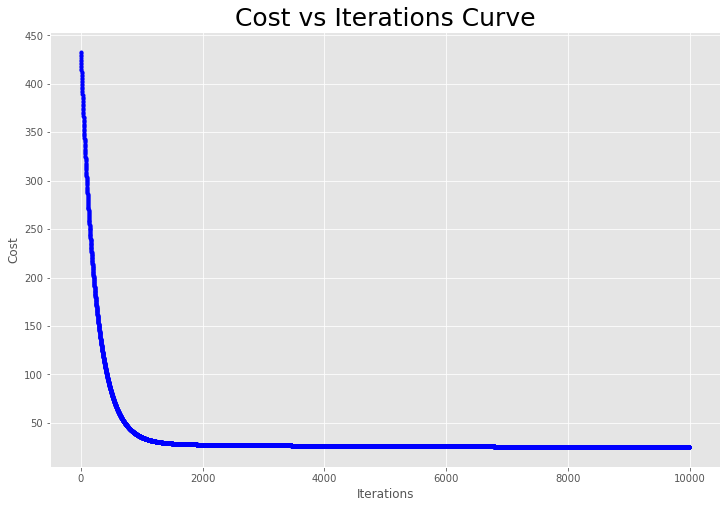

In [21]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
ax.plot(range(iterations),J_history,'b.')
plt.title(label="Error vs Iterations Curve", fontsize=25)

## Iterate through Gradient Descent using a different number of learning rates
### Perform greedy search to find optimal learning rate.

In [ ]:
m=len(ytraining)# number of training examples
input_X=np.c_[np.ones((m,1)),Xtraining] # Add a column of ones to X   m=len(y) #is this column for the prediction BMI values?**

iterations = np.array([100, 1000, 10000, 100000])

alpha = np.array([0.05, 0.025, 0.01, 0.001, 0.0001, 0.00001])
SSE = 100
best_alpha = 0
best_iteration = 0

for a in (alpha):
    for iteration in iterations:
        theta1,J_history=gradientDescent(input_X,ytraining,theta,a,iteration)
        print("The Sum of Squared Errors in the training set for alpha:", a, "is:", sumSquaresError(ytraining.reshape(615,-1), predict(theta1, input_X)))
        SSE_test = sumSquaresError(ytraining.reshape(615,-1), predict(theta1, input_X))
        if(SSE_test<SSE):
            SSE=SSE_test
            best_alpha = a
            best_iteration = iteration
            
            
print("The optimal alpha (learning rate) is:", best_alpha, "and the amount of iterations is", best_iteration, ", which gives the SSE of: ", SSE)
    

##### The optimal alpha (learning rate) is: 0.05 and the amount of iterations is 10000 , which gives the SSE of:  46.294

## Multiple Linear Regression Predicted vs Actual

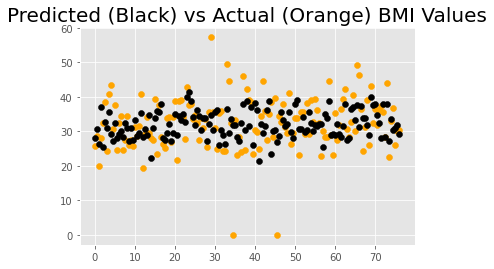

In [23]:
xAxis = np.arange(0,76.5,0.5) #configure the x axis
plt.scatter(xAxis, ytest, color = 'orange') #plot the actual y test output BMI values
plt.scatter(xAxis, preds, color = 'black') #plot the predicted BMI values
plt.title(label="Predicted (Black) vs Actual (Orange) BMI Values", fontsize=20)
plt.show() #show the plot

## Perform PCA on the dataset and reduce the dimensionality to 2 and train a new model on these newly obtained features.

[0.56790606 0.1363363 ]
[12.14705957  5.95166744]
[[ 0.11264745  0.173868    0.03076219  0.02892926  0.05217534  0.06143347
   0.11900892  0.96676667]
 [ 0.6620002   0.07517462  0.16919245 -0.17373986 -0.09968146 -0.08458772
   0.67352326 -0.16299642]]


Text(0.5, 1.0, 'Scatter Plot of Training PCA Features')

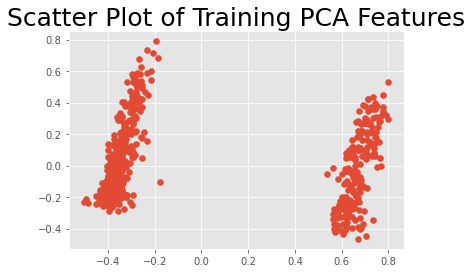

In [24]:
from sklearn.decomposition import PCA
pca_train = PCA(n_components=2) #Number of components to keep. if n_components is not set all components are kept:
#pca.fit(Xtraining) #have this fit to the x values that you want 
#P=pca.transform(Xtraining)
PCA_train = pca_train.fit_transform(Xtraining)
print(pca_train.explained_variance_ratio_)
print(pca_train.singular_values_)
print(pca_train.components_)
plt.scatter(PCA_train[:,0], PCA_train[:,1])
plt.title(label="Scatter Plot of Training PCA Features", fontsize=25)

In [25]:
print(PCA_train)
print(PCA_train.shape)

[[ 0.70610325  0.16145937]
 [-0.39703081 -0.09515428]
 [ 0.70316871  0.09920973]
 ...
 [ 0.74044283  0.06200522]
 [-0.33928074  0.0531164 ]
 [ 0.73541686  0.35651705]]
(615, 2)


#### Train the new model with PCA (2-dimentional) Training Data

In [26]:
## Train the linear model with the two new PCA features
m=len(ytraining)# number of training examples
input_X_PCA_train = np.c_[np.ones((m,1)),PCA_train] # Add a column of ones to represent the bias
theta=np.ones((3,1)) # Initialize fitting parameters to 3 1's
iterations=10000
alpha = 0.001  #this is the learning rate, play around with this
thetaPCA,PCA_cost=gradientDescent(input_X_PCA_train,ytraining,theta,alpha,iterations)#gets the final data and the values of cost function in each iteration
print("The Sum of Squared Errors in the training set for alpha:", alpha, "is:", sumSquaresError(ytraining.reshape(615,-1), predict(thetaPCA, input_X_PCA_train)))


The Sum of Squared Errors in the training set for alpha: 0.001 is: 56.467


#### Reduce Dimentions of the Test Data using PCA (2-dimentional) 

[0.59237729 0.1424136 ]
[6.09509119 2.98852391]
[[ 0.13497234  0.15917749  0.04277104  0.02124144  0.00747297  0.03214294
   0.15641545  0.96364393]
 [ 0.67712274 -0.03165663  0.23986607 -0.15852164 -0.18073913 -0.01027325
   0.62182658 -0.19595239]]


Text(0.5, 1.0, 'Scatter Plot of Test PCA Features')

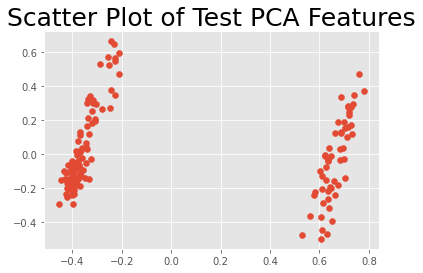

In [27]:
# Reduce the testing features to 2 values using PCA
pca_test = PCA(n_components=2) #Number of components to keep. if n_components is not set all components are kept:
PCA_test = pca_test.fit_transform(Xtest)
print(pca_test.explained_variance_ratio_)
print(pca_test.singular_values_)
print(pca_test.components_)
plt.scatter(PCA_test[:,0], PCA_test[:,1])
plt.title(label="Scatter Plot of Test PCA Features", fontsize=25)

#### Sum of Squared Errors for PCA (2-dimentional) Test Data

In [28]:
m=len(ytest)# number of training examples
input_X_PCA_test=np.c_[np.ones((m,1)),PCA_test] # Add a column of ones to X BIAS

print("The Sum of Squared Errors in the training set for alpha:", alpha, "is:", sumSquaresError(ytest.reshape(153,-1), predict(thetaPCA, input_X_PCA_test)))

The Sum of Squared Errors in the training set for alpha: 0.001 is: 55.74


In [29]:
# Predict the output given the testing data with the PCA features
m=len(ytest)# number of test examples
input_X_PCA_test=np.c_[np.ones((m,1)),PCA_test] # Add a column of ones to X BIAS
preds = predict(thetaPCA, input_X_PCA_test) #make predictions on Xtest
print("shape of preds:") 
print((preds.shape))

y_2 = ytest.reshape(153,-1)
twod =np.column_stack((preds, y_2))
#print(preds)
np.savetxt("PCA_Predicted_BMI.csv", twod, delimiter=",") #export the predicted values to a csv file


shape of preds:
(153, 1)


## PCA predicted vs actual

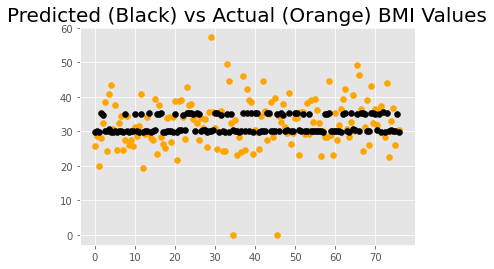

In [30]:
xAxis = np.arange(0,76.5,0.5) #configure the x axis
plt.scatter(xAxis, ytest, color = 'orange') #plot the actual y test output BMI values
plt.scatter(xAxis, preds, color = 'black') #plot the predicted BMI values
plt.title(label="Predicted (Black) vs Actual (Orange) BMI Values", fontsize=20)
plt.show() #show the plot

## PCA Cost function vs Iterations curve

Text(0.5, 1.0, 'Cost vs Iterations Curve')

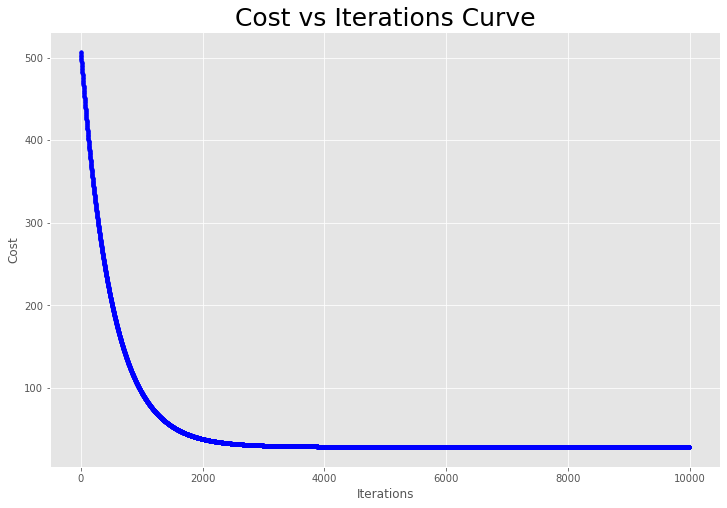

In [31]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
ax.plot(range(iterations),PCA_cost,'b.')
plt.title(label="Cost vs Iterations Curve", fontsize=25)

In [32]:
thetaPlot = np.delete(thetaPCA,1) #delete the middle element out of theta

In [33]:
thetaPlot

array([31.89584004, -0.51827854])

### Show the scatter plot of PCA generated new features and also show the linear regression curve that you got from new model.

Text(0, 0.5, '$y$')

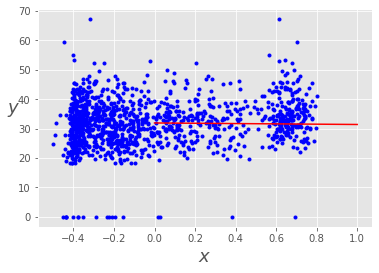

In [34]:
X_ln = np.array([Xtest.min(),Xtest.max()]) #Plot a line between min x and max x
A_ln = np.c_[np.ones((2,1)),X_ln]
y_ln = A_ln.dot(thetaPlot)

plt.figure(1)
plt.plot(X_ln,y_ln,'r-',zorder=10)
plt.plot(PCA_train,ytraining,'b.', zorder=1)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [ ]:
X_ln = np.array([Xtest.min(),Xtest.max()]) #Plot a line between min x and max x
A_ln = np.c_[np.ones((2,1)),X_ln]
y_ln = A_ln.dot(thetaPlot)

plt.figure(1)
plt.plot(X_ln,y_ln,'r-',zorder=10)
plt.plot(norm_X,y,'b.', zorder=1)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)